# Week 3-- Dynamic programming, alignment, sequences
In this week we will turn our attention to a slightly more meaty computational topic-- sequence alignment. Our goal through the end of week three is to create a multiple alignment from a set of SARS-CoV-2 genomes that we might play with in coming weeks.

As we talked about in lecture, the problem of sequence alignment arises because of the need for us to be comparing apples to apples between genomes. That is to say that we want to try to ensure that we are considering *homologous* traits, in this case basepairs of the genome, when we start to consider the evolutionary relationships among DNA sequences. 

Consider the number of ways in which two DNA sequences can be aligned one to another. It's easy enough to imagine that as these sequences themselves get longer, so too does the number of possible alignments. To figure out which alignment among all of these possibilities is the best will be a challenge, so we're gonna need a clever algorithm that allows us to compute stuff cheaply.

Our solution comes from family of algorithms called Dynamic Programming. Dynamic programming exploits the fact that many problems can actually be decomposed into smaller subproblems, that when combined can solve a larger whole problem. This substructure solution comes from what we call _recursion_.


## The Fibonacci sequence
The Fibonacci sequence was famously introduced by a 13th Century Italian mathematician of the same name to describe the growth of rabbit populations. The sequence of Fibonacci numbers goes like this:

$F_0 = 0, F_1 = 1$ and $F_n = F_{n-1} + F_{n-2}$

**Exercise 1:**
In class, write a function to compute all of the Fibonacci series up to some defined $i$th term. Your function should take $i$, the last number in the series to calculate as input and return $F_i$

## Recursive functions
In mathematics recursive equations are those which are defined on the basis of previous terms of the same equation. For instance the Fibonacci series above is _recursive_ in that $F_n$ is calculated from $F_{n-1}$ and $F_{n-2}$. In computer programming the analog is a _recursive function_ that calls itself to achieve the desired output.

As a very simple example check out the recursive function below `recFunc()`

In [1]:
def recFunc(anInt):
    print(anInt)
    if anInt > 0:
        anInt -= 1
        recFunc(anInt)
        
recFunc(3)

3
2
1
0


here `recFunc()` is making calls to `recFunc()` from within it's own code until something happens! Can you follow the logic here? If you can the next thing to do is switch the order of the `if` block and the `print` statement. Now what's happening? 

In [2]:
 def recFunc(anInt):
    if anInt > 0:
        anInt -= 1
        recFunc(anInt)
    print(anInt)
        
recFunc(3)

0
0
1
2


**Exercise 2:** In class, write a new Fibonacci function that outputs the $i$th term, but this time do it using a recursive function.

In [4]:
def F(i):
    if i == 0:
        return(0)
    elif i == 1:
        return(1)
    else:
        return(F(i-1) + F(i-2))

## Dynamic Programming version
So let's say that we were writing a program that had to pull out lots of Fibonacci numbers over and over again, what would be a good way to do this efficient? Well what if we fill in a table to do this for us?

**Exercise 3:** Write a new Fibonacci function, but this one will take as input $i$ the last term to be computed but will return a numpy array of Fibonacci numbers up to and including $F_i$. Can you think of a clever way to do this that uses the structure of the problem?



## Efficiency comparison
Let's see how long a naive implementation of the function which returns the list of Fibonacci numbers is versus a Dynamic programming implementation. To do this I'll use a jupyter built in trick called `%timeit` which will return the amount of time used by the computer to evaluate a block of code

In [5]:
%%timeit
fs = np.zeros(20)
for i in range(20):
    fs[i] = F(i)
fs

5.27 ms ± 290 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
def F_dp(aInt):
    res = np.ones(aInt)
    if aInt > 1:
        for i in range(2,aInt):
            res[i] = res[i-1] + res[i-2]
    return(res)

In [7]:
%%timeit
F_dp(20)

9.53 µs ± 220 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Tower of Hanoi Game
Okay let's look at a slightly more difficult dynamic programming problem-- solving for the minimum number of moves necessary to win the Tower of Hanoi game. Recall that the game consist of three rods (call them A, B, and C), onto which $n$ disks of increasing size sit. At the start of the game all $n$ disks are on the A rod. The objective is to move the $n$ disks to another rod (B or C). The rules are that 
1. Only 1 disk can be moved at a time
2. Each move consists of moving the upper disk on a rod to the top of the pile on a different rod
3. No larger disk may be placed on a smaller disk. 

Here's what an animation of the game looks like start from 6 disks

<img src=imgs/Tower_of_Hanoi.gif>

What's cool about this, seemingly hard problem is that we can break it up into the optimal move to do from any position, using a simple recursion. Here's what it looks like. Let's spend a bit of time analyzing it.

In [ ]:
def TowerOfHanoi(n , from_rod, to_rod, aux_rod): 
    if n == 1: 
        print(f"Move disk 1 from rod {from_rod} to rod {to_rod}") 
        return
    TowerOfHanoi(n-1, from_rod, aux_rod, to_rod) 
    print(f"Move disk {n} from rod {from_rod} to rod {to_rod}")
    TowerOfHanoi(n-1, aux_rod, to_rod, from_rod) 
    
TowerOfHanoi(3 , "A", "C", "B")

**Exercise:** change the starting value of n (= the number of disks) to 2. Does this make sense? Now try a larger number

## Sequence Alignment
Now that we've spent a bit of time learning the context for dynamic programming, let's dig in to a more germane (and complex!) model-- that of global alignment of two sequences. The alignment method we will look at, the so-called Needleman-Wunsch algorithm, was developed by Saul B. Needleman and Christian D. Wunsch and published in 1970 in a [landmark publication](https://www.sciencedirect.com/science/article/abs/pii/0022283670900574?via%3Dihub). A key innovation here was that they represent a sequence alignment as a matrix, and fill in scores within that matrix using a dynamic programming approach, essentially breaking the large problem (global alignment) into a repeated series of smaller problems (should the next state be a gap, a match, or a mismatch). 

As we spent time thinking about this in class I won't belabor my description too much 


In [ ]:
# set sequences
seq_1 = "TAGACTA"
seq_2 = "TACGGACGG"

# define penalties for alignment
match = 4
m_match = -3
gap_penalty = -2

subst_matrix = {
'A': {'A': match,'C':m_match,'G':m_match,'T':m_match}, 
'C': {'A':m_match,'C': match,'G':m_match,'T':m_match}, 
'G': {'A':m_match,'C':m_match,'G': match,'T':m_match},
'T': {'A':m_match,'C':m_match,'G':m_match,'T': match},
}


# this will store our dynamic programming matrix
dp_matrix = np.ndarray(shape=(len(seq_1)+1,len(seq_2)+1), dtype=int)
dp_matrix.fill(0)

# storage for trace back matrix
# 0 for up, 1 for diag, 2 for left
back_ptr = np.ndarray(shape=(len(seq_1)+1,len(seq_2)+1), dtype=int)
back_ptr.fill(-9)

# fill the DP matrix
for i in range(len(seq_1)+1):
    for j in range(len(seq_2)+1):
        if i==0 and j==0: continue # skip the first cell

        char_1 = seq_1[i-1] # current character at seq 1
        char_2 = seq_2[j-1] # current character at seq 2

        scores = np.array([-999,-999,-999])
        if( i>0 and j>0 ):  
            # score diagonal
            scores[1] = subst_matrix[char_1][char_2] + dp_matrix[i-1][j-1]
            pass
        if( i>0 ): 
            # score up: gap in sequence 2
            scores[2] = gap_penalty + dp_matrix[i-1][j]
            pass
        if( j>0 ): 
            # score left: gap in sequence 1
            scores[0] = gap_penalty + dp_matrix[i][j-1]
            pass

        # select the best previous cell
        best = np.max(scores)
        dp_matrix[i,j]=best
        for k in range(3):
            if scores[k] == best:
                back_ptr[i,j] = k

print("Dynamic programming matrix:")
print(dp_matrix)
print("\n traceback pointers:")
print(back_ptr)

# read out the backtrace to get the best alignment
aln_1 = ""
aln_2 = ""
i=len(seq_1)
j=len(seq_2)

while i>0 or j>0:
    if back_ptr[i,j] == 0: # left
        aln_1 += "-"
        aln_2 += seq_2[j-1]
        j -= 1
    if back_ptr[i,j] == 1: # diag
        aln_1 += seq_1[i-1]
        aln_2 += seq_2[j-1]
        i -= 1
        j -= 1
    if back_ptr[i,j] == 2: # up
        aln_1 += seq_1[i-1]
        aln_2 += "-"
        i -= 1

aln_1 = aln_1[::-1] # reverses the string
aln_2 = aln_2[::-1]

print("\nAlignment:")
print(aln_1)
print(aln_2)



**Exercise:** change the `gap_penalty` parameter above to equal 0. What is the reported alignment that you get out? Next return the `gap_penalty` to -2 but increase the mismatch penalty. Now what do you see?

the Needleman-Wunsch algorithm above performs _global_ alignment, i.e. it seeks the best alignment of all the bases in the two sequences. If we want to instead find the best alignment of subsequences between the two sequences we can use the related [Smith-Waterman algorithm](https://en.wikipedia.org/wiki/Smith%E2%80%93Waterman_algorithm). Recall from lecture that the only real differences here are that in Smith-Waterman scores in our DP matrix can't go below zero, and that the traceback starts at the *max* value cell and goes back until it encounters the first zero. 

# Biopython 
Now that we know something about sequence alignment we are ready to move on to our case study for the week-- aligning SARS-CoV-2 genome data. To do this we will rely on the python package `biopython`.

For anyone working with DNA or protein sequence information, `biopython` provides an extremely helpful set of tools. biopython gives the user the ability to programatically interact with biological sequence data and includes plugins to popular alignment and homology search algorithms such as BLAST or CLUSTAL, phylogenetic packages, and much more. We will barely scratch the surface in the kinds of things that one can accomplish, so if you are interested you can start reading the documentation [here](https://biopython.org/wiki/Documentation).


## Working with sequences
The first use case for us will be working with DNA sequences using biopython. biopython provides for us a `Seq` object, that contains at it's heart a string of biological sequence but that "knows" how to do certain tricks

sequences generally behave as strings, meaning that you can index them and iterate over them, etc.

In [8]:
from Bio.Seq import Seq
my_seq = Seq("AGTATCTTTGGT")
print(my_seq)

print(my_seq.complement())
print(my_seq.reverse_complement())

AGTATCTTTGGT
TCATAGAAACCA
ACCAAAGATACT


Aside from containing strings `Seq` objects also have an alphabet that can be set so that the object is even a bit smarter. This can tell the object that it is dealing with DNA vs Proteins for instance or perhaps that it is dealing with an alphabet that might include ambiguities. The standard DNA and Protein alphabets can been established by an international chemical standards group called [IUPAC](https://iupac.org/). Here's the IUPAC DNA extended alphabet that allows for ambiguous positions

<img src=imgs/iupac.png>

we can set the alphabet associated with a Seq object directly 

In [10]:
my_seq = Seq("AGTATCTTTGGT")
#check the alphabet of my_seq
print(my_seq.alphabet) #returns a generic thing

#set alphabet specifically
from Bio.Alphabet import IUPAC
my_seq = Seq("AGTATCTTTGGT",IUPAC.unambiguous_dna)
print(my_seq.alphabet)

Alphabet()
IUPACUnambiguousDNA()


sequences generally behave as strings, meaning that you can index them and iterate over them, etc.

In [ ]:
for c in my_seq:
    print(c)
    
print("here is my_seq[0]: ",my_seq[0])

In [ ]:
#compute GC percentage / 6-frame tx
from Bio.SeqUtils import GC,six_frame_translations
print(my_seq)
print("percent GC ",GC(my_seq))
print("\n")
print(six_frame_translations(my_seq))

there are many other basic sequence utilities that biopython provides. you have to wade through the sequtils documentation a bit to find out everything that it can do out of the box.

## Reading in sequences
Perhaps the single most useful thing that biopython provides is basic utilities to read and write from common data formats such as fasta and fastq. These parsers really aid in our ability to quickly make headway on even sophisticated datasets. We will work with a set of orchid rRNA gene sequences that you can download [here](https://raw.githubusercontent.com/biopython/biopython/master/Doc/examples/ls_orchid.fasta) although I have also included the file in the github repo notebooks directory.



In [ ]:
from Bio import SeqIO
for seq_record in SeqIO.parse("covid/data/gisaid_raw/gisaid_cov2020_sequences_15mar2020.fasta", "fasta"):
    print("id: ",seq_record.id,"length: ",len(seq_record.seq))


In [ ]:
# read in large number of sequences as list of SeqRecords
covid_records = list(SeqIO.parse("covid/data/gisaid_raw/gisaid_cov2020_sequences_15mar2020.fasta", "fasta"))
# write first 20 into small file
SeqIO.write(covid_records[0:20], "covid/data/gisaid_raw/covid_small.fasta", "fasta")
# read small file
covid_records = list(SeqIO.parse("covid/data/gisaid_raw/covid_small.fasta", "fasta"))
print(len(covid_records))

`SeqIO.parse()` actually returns a specific python object called an iterator that can be operated on in a different way, asking it to give you the next object over and over

In [ ]:
#a slightly different way to deal with the iterator that SeqIO.parse returns    
record_iterator = SeqIO.parse("ls_orchid.fasta", "fasta")
first_record = next(record_iterator)
print(first_record.id)
print(first_record.description)

second_record = next(record_iterator)
print(second_record.id)
print(second_record.description)

### Getting sequences straight from Genbank
biopython has code that allows us to download sequences directly from genbank and suck them up in to memory for doing stuff. this is particularly useful for snatching _reference sequences_, the an official representation of a sequence that is often well annotated. We will use this interface to grab a reference genome for SARS-CoV-2

In [ ]:
from Bio import Entrez
from Bio import SeqIO
# need this fake email for the service to work
Entrez.email = "fake_email@thanks.com"
with Entrez.efetch(db="nucleotide", rettype="fasta", retmode="text", id="NC_045512.2") as handle:
    seq_record = SeqIO.read(handle, "fasta")
print(seq_record.id, seq_record.description)

## SeqRecords
the workhorse here is a class called a `SeqRecord` that biopython provides to us. we can get a bunch of information here just be asking the object to print itself. these are smart. full documentation on these [here](https://biopython.org/wiki/SeqRecord)

In [ ]:
print(seq_record)

we can get a bit more information if we retreive files in the so-called genbank format, in particular we will get annotation features associated with the sequence, if they exist in the genbank entry. The genbank page for this entry can be found [here](https://www.ncbi.nlm.nih.gov/nuccore/NC_045512.2), we can look it over in class together to see all the neat information that they include

In [ ]:
from Bio import Entrez
from Bio import SeqIO
Entrez.email = "A.N.Other@example.com"
with Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", id="NC_045512.2") as handle:
    seq_record = SeqIO.read(handle, "gb")
print(seq_record.id, seq_record.description)
#gene_list = [ x  for x in seq_record.features if x.type == 'CDS']

perhaps the biggest thing we get with the genbank file format is _annotations_, that is features of the genome that are represented and stored as so-called SeqFeatures. I can get these by looking at the `.features` attribute associated with my sequence records.

Let's look at the first four features entry from our file

In [ ]:
for i,x in enumerate(seq_record.features):
    if i < 4:
        print(x)


## What genes are in here? Grabbing feature sequences
okay lets get a list of gene names from our features. I've been reading about the spike protein for weeks-- should we look at it?

In [ ]:
# get list of genes
gene_list = [ x  for x in seq_record.features if x.type == 'CDS']
for i,x in enumerate(gene_list):
    print(x.qualifiers['gene'])

okay that S protein is the one. Let's grab it out of our sequence then

In [ ]:
# grab the spike protein
spike = gene_list[2].extract(seq_record)
#print it's sequence
print(spike.seq)

we can even turn this into a protein translation with ease

In [ ]:
print(spike.seq.translate())

note that this starts with an 'M' and ends with a stop codon '*' just like we would expect. looks awesome!

### Sequence files as dicts
If you have a large number of sequences in a file, it's usually best not to read them all in to memory at once. biopython has you covered here functions that will open up a sequence file as sa dictionary that you can query by key



In [ ]:
covid_dict = SeqIO.index("covid/data/gisaid_raw/covid_small.fasta", "fasta")
print(list(covid_dict.keys())[0:5])

In [ ]:
seq_record = orchid_dict['hCoV-19/Wuhan/WIV07/2019|EPI_ISL_402130|2019-12-30']
print(seq_record.description)
print(seq_record.seq[0:100])

### Converting between file formats

Again biopython has you covered for basic conversions between file formats. For instance

In [ ]:
from Bio import SeqIO
count = SeqIO.convert("ls_orchid.fasta", "fasta", "my_example.pir", "pir")
print("Converted %i records" % count)


## Doing multiple sequence alignment
not only can biopython read and write multiple sequence alignments (MSAs) and cleanly represent them in memory, but biopython can even help you create MSAs. 
biopython can work as glue that binds together familiar bioinformatics programs, allowing us to pass information from memory to programs and then back. This depends on having "helper" programs installed that will do the heavy lifting, for instance an alignment program. When we started off this lecture we installed the aligner MUSCLE using conda. We will use the interface to MUSCLE to demostrate this functionality.

In particular we will do an alignment of the sequences in that orchid fasta file we have been playing with

In [ ]:
import os

from Bio.Align.Applications import MafftCommandline
mafft_cline = MafftCommandline("mafft", input="covid/data/gisaid_raw/covid_small.fasta")
muscle_exe = "/Users/adk/miniconda3/bin/mafft"
assert os.path.isfile(muscle_exe), "mafft executable missing"
stdout, stderr = mafft_cline()
with open("aligned.fasta", "w") as handle:
    handle.write(stdout)
# this will take a while
# can print stderr if you want to see what happened

In [15]:
#now suck back in the file
from Bio import AlignIO

cov_align = AlignIO.read("aligned.fasta","fasta")
print(cov_align)

SingleLetterAlphabet() alignment with 20 rows and 29899 columns
--------------ccttcccaggtaacaaaccaaccaactttc...--- hCoV-19/Wuhan/WIV06/2019|EPI_ISL_402129|2019-12-30
-------------accttcccaggtaacaaaccaaccaactttc...--- hCoV-19/Wuhan/WIV07/2019|EPI_ISL_402130|2019-12-30
-----------ataccttcccaggtaacaaaccaaccaactttc...--- hCoV-19/Guangdong/20SF012/2020|EPI_ISL_403932|2020-01-14
-----------ataccttcccaggtaacaaaccaaccaactttc...--- hCoV-19/Guangdong/20SF013/2020|EPI_ISL_403933|2020-01-15
-----------ataccttcccaggtaacaaaccaaccaactttc...--- hCoV-19/Guangdong/20SF014/2020|EPI_ISL_403934|2020-01-15
-----------ataccttcccaggtaacaaaccaaccaactttc...--- hCoV-19/Guangdong/20SF025/2020|EPI_ISL_403935|2020-01-15
-----------ataccttcccaggtaacaaaccaaccaactttc...--- hCoV-19/Guangdong/20SF028/2020|EPI_ISL_403936|2020-01-17
-----------ataccttcccaggtaacaaaccaaccaactttc...--- hCoV-19/Guangdong/20SF040/2020|EPI_ISL_403937|2020-01-18
attaaaggtttataccttcccaggtaacaaaccaaccaactttc...aaa hCoV-19/Wuhan/IPBCAMS-WH-03/2019|

these alignment objects behave as you would expect. for instance we can slice them just as we would numpy arrays to get subsets of the aligned sequences, windows of the alignment, or both

## Count number of differences
let's write a function to count the number of differences between the two sequences in our alignments. we will do this by using a simple loop and asking if the characters are different

In [27]:
def count_diffs(align, seq1, seq2):
    diffs = 0
    for i in range(len(align[0].seq)):
        if align[seq1, i] != align[seq2, i]:
            print(f'different at position {i} -> {align[:, seq1]}')
            diffs += 1
            
    print(f'number of diffs = {diffs}')
    print(f'percentage different = {diffs / i}')

count_diffs(cov_align,0,2)

percentage different = 0.0006020469596628537


**Exercise:** rewrite the above function to only count differences between sequences that do not include alignment gaps (i.e. "-"). 

## Add reference sequence and realign
So the alignment above is great, but we don't have any of our annotations from the Genbank file on there. Let's now add the Genbank reference sequence into our alignment and realign the whole thing. The steps here will be to:
1. add the reference to the alignment object
2. write this out to a file
3. rerun the alignment step from above with the new input

In [13]:
from Bio import Entrez
from Bio import SeqIO

# get the reference seq
# need this fake email for the service to work
Entrez.email = "fake_email@thanks.com"
with Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", id="NC_045512.2") as handle:
    refseq = SeqIO.read(handle, "gb")
print("downloaded", refseq.id, seq_record.description)



NameError: name 'seq_record' is not defined

In [ ]:
# then make a list from cov_align and add refseq; write to temp.fasta
longer_list = [x for x in cov_align]
longer_list.append(refseq)
SeqIO.write(longer_list, "temp.fasta", "fasta")

#now run alignment
mafft_cline = MafftCommandline("mafft", input="temp.fasta")
assert os.path.isfile(muscle_exe), "mafft executable missing"
stdout, stderr = mafft_cline()
with open("temp.aligned.fasta", "w") as handle:
    handle.write(stdout)

In [16]:
    
#import and look at it
new_align = AlignIO.read("temp.aligned.fasta","fasta")
print(new_align)

SingleLetterAlphabet() alignment with 21 rows and 29903 columns
--------------ccttcccaggtaacaaaccaaccaactttc...--- hCoV-19/Wuhan/WIV06/2019|EPI_ISL_402129|2019-12-30
-------------accttcccaggtaacaaaccaaccaactttc...--- hCoV-19/Wuhan/WIV07/2019|EPI_ISL_402130|2019-12-30
-----------ataccttcccaggtaacaaaccaaccaactttc...--- hCoV-19/Guangdong/20SF012/2020|EPI_ISL_403932|2020-01-14
-----------ataccttcccaggtaacaaaccaaccaactttc...--- hCoV-19/Guangdong/20SF013/2020|EPI_ISL_403933|2020-01-15
-----------ataccttcccaggtaacaaaccaaccaactttc...--- hCoV-19/Guangdong/20SF014/2020|EPI_ISL_403934|2020-01-15
-----------ataccttcccaggtaacaaaccaaccaactttc...--- hCoV-19/Guangdong/20SF025/2020|EPI_ISL_403935|2020-01-15
-----------ataccttcccaggtaacaaaccaaccaactttc...--- hCoV-19/Guangdong/20SF028/2020|EPI_ISL_403936|2020-01-17
-----------ataccttcccaggtaacaaaccaaccaactttc...--- hCoV-19/Guangdong/20SF040/2020|EPI_ISL_403937|2020-01-18
attaaaggtttataccttcccaggtaacaaaccaaccaactttc...--- hCoV-19/Wuhan/IPBCAMS-WH-03/2019|

see that last sequence name? that's our reference genome! let's see if there are any gaps inserted into the reference. this is important because it will throw off the locations of our annotations (e.g. genes) that we got with our reference sequence. Do do this I'll just use the built in biopython function `count()`

In [17]:
print(new_align[-1].seq.count("-"))

0


so we are actually good to go here-- things line up well to the reference. Next let's try to apply our annotation to the alignment and pull out specific regions

In [18]:
# find S gene index
gene_list = [ x  for x in refseq.features if x.type == 'CDS']
for i,x in enumerate(gene_list):
    if x.qualifiers['gene'] == ['S']:
        print("index",i,"\n",x)


index 2 
 type: CDS
location: [21562:25384](+)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: db_xref, Value: ['GeneID:43740568']
    Key: gene, Value: ['S']
    Key: gene_synonym, Value: ['spike glycoprotein']
    Key: locus_tag, Value: ['GU280_gp02']
    Key: note, Value: ['structural protein; spike protein']
    Key: product, Value: ['surface glycoprotein']
    Key: protein_id, Value: ['YP_009724390.1']
    Key: translation, Value: ['MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTG

In [30]:
spike_align = new_align[:,gene_list[2].location.start.position:gene_list[2].location.end.position]



In [39]:
def count_diffs2(align, seq1, seq2):
    diffs = 0
    for i in range(len(align[0].seq)):
        if align[seq1, i] != align[seq2, i] and align[seq1, i] != '-' \
            and align[seq2, i] != "-":
            diffs += 1
    return(diffs)

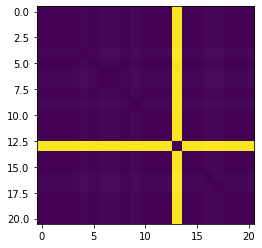

In [41]:
from matplotlib import pyplot as plt

n = len(spike_align)
dist_mat = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        dist_mat[i,j] = count_diffs2(spike_align,i,j)

plt.imshow(dist_mat)

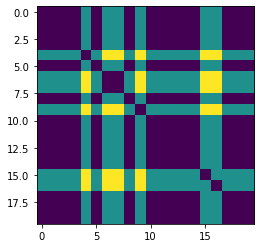

In [73]:
from Bio.Align import MultipleSeqAlignment
align = MultipleSeqAlignment([])
for i in range(13):
    align.append(spike_align[i])
for i in range(14,21):
    align.append(spike_align[i])

#print(align)
n = len(align)
dist_mat = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        dist_mat[i,j] = count_diffs2(align,i,j)

plt.imshow(dist_mat)

## get summary info
from Bio.Align import AlignInfo
summary_align = AlignInfo.SummaryInfo(cov_align)
consensus = summary_align.dumb_consensus()

In [ ]:
# Position specific weight matrix for bp 100-110
summary_align = AlignInfo.SummaryInfo(orchid[:,0:10])
consensus = summary_align.dumb_consensus()
print("consensus sequence: ",consensus)
my_pssm = summary_align.pos_specific_score_matrix(consensus, chars_to_ignore = ['N'])
print(my_pssm)